<a href="https://colab.research.google.com/github/its-rajesh/Music-Speech-Separation/blob/main/MSClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MUSIC SPEECH CLASSIFIER**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import soundfile as sf
import librosa as lb
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

### Reading STFT & Chroma STFT Features

In [3]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [7]:
path = '/drive/My Drive/Projects/Music-Speech-Separation/Dataset/'

In [8]:
folders = os.listdir(path)
folders

['music', 'Mixture', 'Overlay', 'speech']

In [9]:
audiofiles = []
for folder in folders:
    files = os.listdir(path+'/'+folder)
    files = sorted(files)
    audio = []
    for file in files:
        data, samplerate = lb.load(path+'/'+folder+'/'+file, sr=8000, mono=True)
        audio.append(data)
    audiofiles.append(audio)

In [10]:
music = np.array(audiofiles[0])
mixture = np.array(audiofiles[1])
overlay = np.array(audiofiles[2])
speech = np.array(audiofiles[3])

dataset = [music, mixture, overlay, speech]

In [65]:
music[0], len(music[0]), len(music[0])/8000

(array([-0.06211764, -0.17527802, -0.13408872, ...,  0.06697536,
         0.07972796,  0.11764227], dtype=float32), 120000, 15.0)

In [75]:
def createchunks(audio):
  start = 0
  stop = 4000 # for 0.5 seconds (8Khz): 1 sec has 8000 samples.
  chunks = []
  for i in range(len(audio)//4000):
    chunks.append(audio[start:stop])
    start = stop
    stop = start+4000

  return chunks

#x = np.array(createchunks(music[0]))
#print(x.shape)

In [110]:
''' #SAMPLE FOR CHUNKS STFT
chunks = np.array(createchunks(music[0]))
spect = []
for i in chunks:
  spect.append(np.abs(lb.stft(i,n_fft=512))) #window length = nfft and hop length = win length //4

spect = np.array(spect)
spect.shape
'''


' #SAMPLE FOR CHUNKS STFT\nchunks = np.array(createchunks(music[0]))\nspect = []\nfor i in chunks:\n  spect.append(np.abs(lb.stft(i,n_fft=512))) #window length = nfft and hop length = win length //4\n\nspect = np.array(spect)\nspect.shape\n'

##### STFT Features

In [155]:
datasetstft = []
index = 0
y, y_train = [], []
for data in [music, speech]:
    spect = []
    for audio in data:
      chunks = np.array(createchunks(audio))
      chunks_spect = []
      for i in chunks:
        chunks_spect.append(np.abs(lb.stft(i,n_fft=512))) #window length = nfft and hop length = win length //4

      chunks_spect = np.array(chunks_spect)

      spect.append(chunks_spect)

      if index == 0:
        y.append(np.zeros(30))
      elif index == 1:
        y.append(np.ones(30))
    
    index += 1
    y_train.append(np.array(y))
    datasetstft.append(np.array(spect))

In [156]:
y_train[0].shape, len(y_train)

((50, 30), 2)

In [157]:
datasetstft[0].shape, len(datasetstft)

((50, 30, 257, 32), 2)

##### Chroma Features

In [109]:
datasetchroma = []
for data in [music, speech]:
    chroma_spect = []
    for audio in data:
      chunks = np.array(createchunks(audio))
      chunks_chroma = []
      for i in chunks:
        chunks_chroma.append(lb.feature.chroma_stft(y=audio)) 

      chunks_chroma = np.array(chunks_chroma)

      chroma_spect.append(chunks_chroma)
    datasetchroma.append(np.array(chroma_spect))

##### Reshaping the training datasets

In [134]:
X_TRAIN = []
for data in datasetstft:
  for i in data:
    for j in i:
      X_TRAIN.append(j)


X_TRAIN = np.array(X_TRAIN)
X_TRAIN.shape


(3000, 257, 32)

In [145]:
y_train[0][0].shape, y_train[0].shape, y_train.shape, 50*30*2

((30,), (50, 30), (2,), 3000)

In [160]:
Y_TRAIN = []
for val in y_train[1]: #still confused how it works???
  for i in val:
    Y_TRAIN.append(i)

Y_TRAIN = np.array(Y_TRAIN)
Y_TRAIN.shape, Y_TRAIN


((3000,), array([0., 0., 0., ..., 1., 1., 1.]))

### TEST DATA

In [174]:
test_path = '/drive/My Drive/Projects/Music-Speech-Separation/Test Dataset/'

In [175]:
folders = os.listdir(test_path)
print(folders)
print(test_path+folders[0])


['music', 'speech', 'overlay', 'mixture']
/drive/My Drive/Projects/Music-Speech-Separation/Test Dataset/music


In [180]:
audiofiles_test = []
for folder in ['speech', 'music', 'mixture']:
  files = os.listdir(test_path+folder)
  files = sorted(files)
  audio = []
  for file in files:
      data, samplerate = lb.load(test_path+folder+'/'+file, sr=8000, mono=True)
      audio.append(data)
  audiofiles_test.append(audio)

In [181]:
music_test = np.array(audiofiles_test[0])
mixture_test = np.array(audiofiles_test[2])
speech_test = np.array(audiofiles_test[1])

dataset_test = [speech_test, music_test, mixture_test]

In [187]:
dataset_test_stft = []
index = 0
y_test = []
for data in [music_test, speech_test]:
    spect = []
    y = []
    for audio in data:
      chunks = np.array(createchunks(audio))
      chunks_spect = []
      for i in chunks:
        chunks_spect.append(np.abs(lb.stft(i,n_fft=512))) #window length = nfft and hop length = win length //4

      chunks_spect = np.array(chunks_spect)

      spect.append(chunks_spect)

      if index == 0:
        y.append(np.zeros(30))
      elif index == 1:
        y.append(np.ones(30))
    
    index += 1
    y_test.append(np.array(y))
    dataset_test_stft.append(np.array(spect))

In [188]:
dataset_test_stft[0].shape, len(dataset_test_stft)

((10, 30, 257, 32), 2)

In [189]:
X_TEST = []
for data in dataset_test_stft:
  for i in data:
    for j in i:
      X_TEST.append(j)


X_TEST = np.array(X_TEST)
X_TEST.shape

(600, 257, 32)

In [193]:
Y_TEST = []
for val in y_test:
  for i in val:
    for j in i:
      Y_TEST.append(j)

Y_TEST = np.array(Y_TEST)
Y_TEST.shape


(600,)

## CNN MODEL



> Indented block



In [161]:
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Dropout,Conv2D,MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [162]:
batch_size = 32
epochs = 10
inp = Input(shape =(257, 32, 1))
out_dim = 2

In [163]:
start = time.time()

x = Conv2D(32, 3, activation='relu')(inp)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.30)(x)

x = Conv2D(64, 3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.30)(x)

x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.30)(x)

x = Dense(out_dim, activation='softmax')(x)

In [164]:
x_train = X_TRAIN
y_train = Y_TRAIN

In [165]:
classify = Model(inputs = inp, outputs = x)
classify.compile(loss='SparseCategoricalCrossentropy', optimizer = 'adam', metrics='accuracy') 
#classify.summary()
classify_train = classify.fit(x_train,y_train, epochs = epochs ,batch_size=batch_size)
end = time.time()
print("time taken",time)

Epoch 1/10
94/94 [==============================] - 42s 438ms/step - loss: 0.6386 - accuracy: 0.8947
Epoch 2/10
94/94 [==============================] - 39s 411ms/step - loss: 0.0993 - accuracy: 0.9653
Epoch 3/10
94/94 [==============================] - 38s 408ms/step - loss: 0.0697 - accuracy: 0.9763
Epoch 4/10
94/94 [==============================] - 39s 411ms/step - loss: 0.0575 - accuracy: 0.9793
Epoch 5/10
94/94 [==============================] - 38s 408ms/step - loss: 0.0319 - accuracy: 0.9903
Epoch 6/10
94/94 [==============================] - 39s 415ms/step - loss: 0.0264 - accuracy: 0.9913
Epoch 7/10
94/94 [==============================] - 39s 415ms/step - loss: 0.0191 - accuracy: 0.9940
Epoch 8/10
94/94 [==============================] - 39s 414ms/step - loss: 0.0258 - accuracy: 0.9910
Epoch 9/10
94/94 [==============================] - 39s 411ms/step - loss: 0.0421 - accuracy: 0.9880
Epoch 10/10
94/94 [==============================] - 38s 406ms/step - loss: 0.0598 - accura

In [194]:
test_eval = classify.evaluate(X_TEST,  Y_TEST, verbose=0)
print('Test', test_eval)

Test [14.589241981506348, 0.07333333045244217]


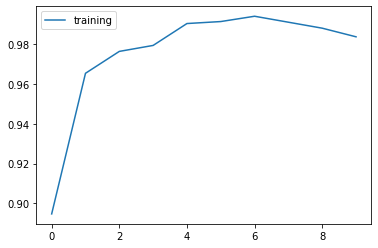

In [196]:
plt.plot(classify_train.history['accuracy'])
plt.legend(['training'], loc = 'upper left')
plt.show()

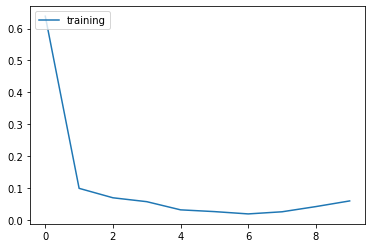

In [197]:
plt.plot(classify_train.history['loss'])
plt.legend(['training'], loc = 'upper left')
plt.show()

In [202]:
result = classify.predict(X_TEST)
result

array([[3.5903632e-08, 1.0000000e+00],
       [1.1388086e-10, 1.0000000e+00],
       [1.4641431e-10, 1.0000000e+00],
       ...,
       [1.0000000e+00, 1.7879422e-09],
       [1.0000000e+00, 6.7165243e-24],
       [1.0000000e+00, 2.0817273e-34]], dtype=float32)

# TEST ON AIR DATA

In [203]:
sample_audio, sr  = lb.load('/drive/My Drive/Projects/Music-Speech-Separation/trimmed.wav', sr=8000, mono=True)
sample_audio, sr

(array([0.        , 0.        , 0.        , ..., 0.1968468 , 0.09085861,
        0.06629869], dtype=float32), 8000)